# Matin Ghorbani 6.2.Assignment
---

## Import Dependencies

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from knn import KNN

In [5]:
femail_data = pd.read_csv('../datasets/ANSUR/ANSUR II FEMALE Public.csv')
mail_data = pd.read_csv('../datasets/ANSUR/ANSUR II MALE Public.csv', encoding='latin-1')
mail_data = mail_data.rename(columns={'subjectid': 'SubjectId'})
data = pd.concat([femail_data, mail_data])
data.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,...,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,...,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,...,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,...,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,...,Combat Arms,42A,Texas,1,NaN,1,45,63,195,Right hand


## Preprocessing

In [6]:
data['weightkg'] = data['weightkg'] / 10
data['stature'] = data['stature'] / 10
data['chestcircumference'] = data['chestcircumference'] / 10
data['shoulderlength'] = data['shoulderlength'] / 10
data['Gender'] = data['Gender'].replace(['Female', 'Male'], [0, 1])
data = data[['stature', 'weightkg', 'chestcircumference', 'shoulderlength', 'Gender']]
data['stature'] = pd.to_numeric(data['stature'], downcast='float')
data['weightkg'] = pd.to_numeric(data['stature'], downcast='float')
data['chestcircumference'] = pd.to_numeric(data['stature'], downcast='float')
data['shoulderlength'] = pd.to_numeric(data['stature'], downcast='float')
data.head()

,stature,weightkg,chestcircumference,shoulderlength,Gender
0,156.000000,156.000000,156.000000,156.000000,0
1,166.500000,166.500000,166.500000,166.500000,0
2,171.100006,171.100006,171.100006,171.100006,0
3,166.000000,166.000000,166.000000,166.000000,0
4,157.199997,157.199997,157.199997,157.199997,0


## Show heights for women and men on same plot

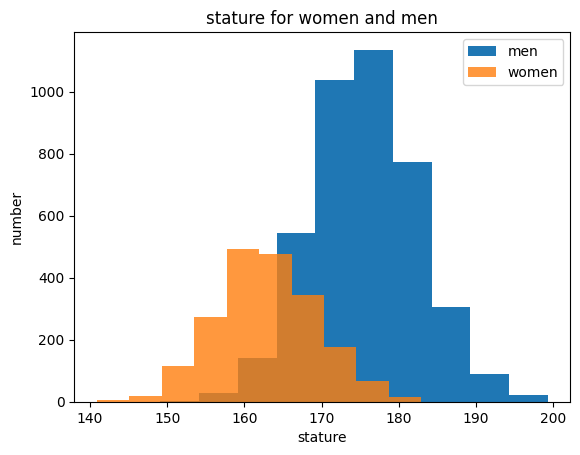

In [7]:
plt.hist(data.query('Gender == 1')['stature'])
plt.hist(data.query('Gender == 0')['stature'], alpha=.80)
plt.title('stature for women and men')
plt.xlabel('stature')
plt.ylabel('number')
plt.legend(['men', 'women'])
plt.show()

### Why is the data of men higher than the data of women?
- Because they have taken more data from men
---
### Why is the data of men more right than the data of women?
- Because the average height of men is higher than women

## Split dataset to train and test datasets (%80 for train and %20 for test)

In [16]:
x = data.drop(["Gender"], axis=1)
y = data[['Gender']]

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

# Implement and fit our object oriented KNN algorithm on the train dataset.

In [18]:
my_knn = KNN(k=7)
my_knn.fit(x_train, y_train)

In [19]:
my_knn.predict([156, 65, 92, 14])

x_train is: stature
<class 'str'>
stature
<class 'int'>
156


TypeError: unsupported operand type(s) for -: 'int' and 'str'

## Evaluate your KNN algorithm on the test dataset with different values

In [20]:
from knn import KNN

n_neighbors = range(1, 22, 2)
accuracies = []
for n in n_neighbors:
    myknn = KNN(n)
    myknn.fit(x_train, y_train)
    accuracies.append(myknn.evaluate(x_test, y_test))

x_train is: stature
<class 'str'>
stature
<class 'str'>
stature


TypeError: unsupported operand type(s) for -: 'str' and 'str'

# Fit the scikit-learn KNN algorithm on the train dataset:

In [34]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train, y_train)

/home/matin/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=9)

In [35]:
knn.score(x_test, y_test)

0.8360790774299836

In [36]:
result = knn.predict(np.array([156, 65, 92, 14]).reshape(1, -1))

/home/matin/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [37]:
if result == 1:
    print('👦')
else:
    print('👩')

👩


## Calculate confusion matrix using scikit-learn

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

In [39]:
y_pred = knn.predict(x_test)
y_pred

array([1, 1, 1, ..., 1, 0, 0])

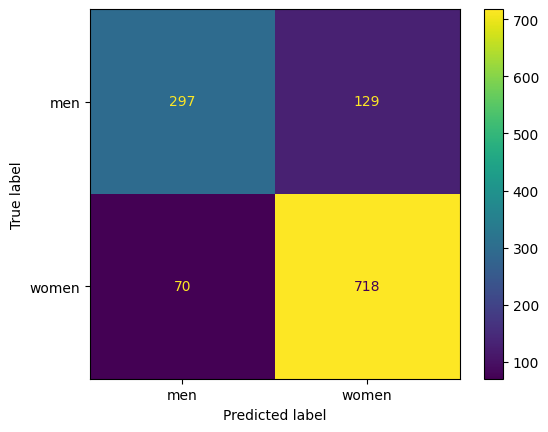

In [40]:
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['men', 'women'])
cm_display.plot()
plt.show()